<a href="https://colab.research.google.com/github/monsieurpablo/HL-kaleidoscope-thermal/blob/main/ml_pycaret_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 10.6 MB/s e

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/monsieurpablo/HL-kaleidoscope-thermal/main/231221_merged.csv'

# Read in the data
df = pd.read_csv(url, index_col=0)
# Drop rows with null values in the target column
df = df.dropna(subset=['solar_load(W/m2)'], axis=0, how='any')
df.shape

(5000, 48)

In [ ]:
df.columns

Index(['in_bool_context', 'in_bool_shade', 'in_context_seed', 'in_room_height',
       'in_room_north', 'in_room_width', 'in_shade_hor_depth',
       'in_shade_vert_both_sides', 'in_shade_vert_depth', 'in_window_g',
       'in_window_height', 'in_window_hor_separ', 'in_window_sill_height',
       'in_window_wwr', 'ext_wall_area(m2)', 'ext_win_area(m2)', 'volume(m3)',
       'org_floor_area(m2)', 'adj_floor_area(m2)', 'w_width(m)', 'w_height(m)',
       'w_aspect_ratio', 'w_count', 'shade_v_count', 'shade_h_count',
       'shade_L', 'shade_R', 'shade_T', 'cooling_load(W/m2)', 'peak_date',
       'altitude(deg)', 'azimuth(deg)', 'w_rad_total(kWh)', 'w_rad_april(kWh)',
       'w_rad_may(kWh)', 'w_rad_jun(kWh)', 'w_rad_jul(kWh)', 'w_rad_aug(kWh)',
       'w_rad_sep(kWh)', 'f_rad_total(kWh)', 'f_rad_april(kWh)',
       'f_rad_may(kWh)', 'f_rad_jun(kWh)', 'f_rad_jul(kWh)', 'f_rad_aug(kWh)',
       'f_rad_sep(kWh)', 'solar_load(W/m2)', 'solar_load_adj(W/m2)'],
      dtype='object')

In [ ]:
# Count nulls
df.isnull().sum()

in_bool_context             0
in_bool_shade               0
in_context_seed             0
in_room_height              0
in_room_north               0
in_room_width               0
in_shade_hor_depth          0
in_shade_vert_both_sides    0
in_shade_vert_depth         0
in_window_g                 0
in_window_height            0
in_window_hor_separ         0
in_window_sill_height       0
in_window_wwr               0
ext_wall_area(m2)           0
ext_win_area(m2)            0
volume(m3)                  0
org_floor_area(m2)          0
adj_floor_area(m2)          0
w_width(m)                  0
w_height(m)                 0
w_aspect_ratio              0
w_count                     0
shade_v_count               0
shade_h_count               0
shade_L                     5
shade_R                     5
shade_T                     0
cooling_load(W/m2)          0
peak_date                   0
altitude(deg)               0
azimuth(deg)                0
w_rad_total(kWh)            0
w_rad_apri

In [ ]:
# Remove columns that start with "w_rad"
# df = df.loc[:, ~df.columns.str.startswith('f_rad')]
df.columns

Index(['in_bool_context', 'in_bool_shade', 'in_context_seed', 'in_room_height',
       'in_room_north', 'in_room_width', 'in_shade_hor_depth',
       'in_shade_vert_both_sides', 'in_shade_vert_depth', 'in_window_g',
       'in_window_height', 'in_window_hor_separ', 'in_window_sill_height',
       'in_window_wwr', 'ext_wall_area(m2)', 'ext_win_area(m2)', 'volume(m3)',
       'org_floor_area(m2)', 'adj_floor_area(m2)', 'w_width(m)', 'w_height(m)',
       'w_aspect_ratio', 'w_count', 'shade_v_count', 'shade_h_count',
       'shade_L', 'shade_R', 'shade_T', 'cooling_load(W/m2)', 'peak_date',
       'altitude(deg)', 'azimuth(deg)', 'w_rad_total(kWh)', 'w_rad_april(kWh)',
       'w_rad_may(kWh)', 'w_rad_jun(kWh)', 'w_rad_jul(kWh)', 'w_rad_aug(kWh)',
       'w_rad_sep(kWh)', 'f_rad_total(kWh)', 'f_rad_april(kWh)',
       'f_rad_may(kWh)', 'f_rad_jun(kWh)', 'f_rad_jul(kWh)', 'f_rad_aug(kWh)',
       'f_rad_sep(kWh)', 'solar_load(W/m2)', 'solar_load_adj(W/m2)'],
      dtype='object')

In [ ]:
# Normalize radiation by window area
solar_cols = df.columns[df.columns.str.startswith('w_rad')]
df[solar_cols] = df[solar_cols].div(df['ext_win_area(m2)'], axis=0)
# Replace "(kWh)" with "(kWh/m2)" in solar column names
df.columns = df.columns.str.replace(r"\(kWh\)", "(kWh/m2)")
df

<ipython-input-9-d2460c278f6f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r"\(kWh\)", "(kWh/m2)")


,in_bool_context,in_bool_shade,in_context_seed,in_room_height,in_room_north,in_room_width,in_shade_hor_depth,in_shade_vert_both_sides,in_shade_vert_depth,in_window_g,...,w_rad_sep(kWh/m2),f_rad_total(kWh/m2),f_rad_april(kWh/m2),f_rad_may(kWh/m2),f_rad_jun(kWh/m2),f_rad_jul(kWh/m2),f_rad_aug(kWh/m2),f_rad_sep(kWh/m2),solar_load(W/m2),solar_load_adj(W/m2)
in_a_case_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,86,3.747257,108.109127,15.992297,0.967073,1,0.978035,0.442932,...,40.839443,32267.197971,5297.433121,5951.654335,5757.125428,5926.796865,5321.578484,4019.078852,58.580749,81.519016
2,0,0,56,3.838259,259.784906,7.250491,0.218709,0,0.457958,0.411525,...,74.923109,15834.568736,2516.352931,3048.904149,2808.154850,2764.553233,2611.024855,2085.054553,94.859993,137.351674
3,0,0,71,4.231320,0.082770,11.210168,0.885910,0,0.735570,0.372460,...,25.117298,11676.982713,1641.429653,2248.460612,2492.921268,2334.180386,1767.281834,1191.409042,25.195984,42.093017
4,1,0,54,4.685167,54.706292,11.884163,0.364642,0,0.521790,0.471066,...,28.950235,16802.104891,2474.023310,3300.278239,3425.317922,3354.767292,2634.790166,1614.033540,125.713769,202.325290
5,0,0,97,4.648061,13.169162,19.391155,0.466373,1,0.014896,0.335163,...,25.273432,22590.441419,3179.370742,4368.708789,4807.633338,4540.345381,3412.946396,2277.926692,22.555345,29.371407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,1,33,3.638842,139.232954,17.288779,0.881915,1,0.735866,0.271763,...,56.568773,36514.430495,6385.721221,6465.736139,5890.742341,6268.007432,6180.137134,5330.357183,28.659011,38.743284
4997,0,0,70,4.910020,31.263495,16.340315,0.725973,0,0.291954,0.478047,...,27.589129,22921.069421,3247.650208,4505.501625,4816.450102,4626.285422,3510.221988,2213.510818,22.027403,30.399082
4998,1,1,30,4.752546,136.890689,4.895773,0.456067,1,0.854100,0.453278,...,22.011139,7048.877196,1217.864992,1262.786370,1137.614640,1228.408063,1213.103927,990.809576,55.760079,58.275650


In [ ]:
# Calculate obstruction factor for each shading surface
# tan-1('w_width(m)'/ 'in_shade_vert_depth') * shade_L

df['shade_L_angle'] = np.rad2deg(np.arctan(df['w_width(m)'] / df['in_shade_vert_depth']) * df['shade_L'])
df['shade_R_angle'] = np.rad2deg(np.arctan(df['w_width(m)'] / df['in_shade_vert_depth']) * df['shade_R'])
df['shade_T_angle'] = np.rad2deg(np.arctan(df['w_height(m)'] / df['in_shade_hor_depth']) * df['shade_T'])

df

,in_bool_context,in_bool_shade,in_context_seed,in_room_height,in_room_north,in_room_width,in_shade_hor_depth,in_shade_vert_both_sides,in_shade_vert_depth,in_window_g,...,f_rad_may(kWh/m2),f_rad_jun(kWh/m2),f_rad_jul(kWh/m2),f_rad_aug(kWh/m2),f_rad_sep(kWh/m2),solar_load(W/m2),solar_load_adj(W/m2),shade_L_angle,shade_R_angle,shade_T_angle
in_a_case_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,86,3.747257,108.109127,15.992297,0.967073,1,0.978035,0.442932,...,5951.654335,5757.125428,5926.796865,5321.578484,4019.078852,58.580749,81.519016,72.164158,72.164158,66.058998
2,0,0,56,3.838259,259.784906,7.250491,0.218709,0,0.457958,0.411525,...,3048.904149,2808.154850,2764.553233,2611.024855,2085.054553,94.859993,137.351674,0.000000,0.000000,0.000000
3,0,0,71,4.231320,0.082770,11.210168,0.885910,0,0.735570,0.372460,...,2248.460612,2492.921268,2334.180386,1767.281834,1191.409042,25.195984,42.093017,0.000000,0.000000,0.000000
4,1,0,54,4.685167,54.706292,11.884163,0.364642,0,0.521790,0.471066,...,3300.278239,3425.317922,3354.767292,2634.790166,1614.033540,125.713769,202.325290,0.000000,0.000000,0.000000
5,0,0,97,4.648061,13.169162,19.391155,0.466373,1,0.014896,0.335163,...,4368.708789,4807.633338,4540.345381,3412.946396,2277.926692,22.555345,29.371407,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,1,33,3.638842,139.232954,17.288779,0.881915,1,0.735866,0.271763,...,6465.736139,5890.742341,6268.007432,6180.137134,5330.357183,28.659011,38.743284,70.382968,70.382968,75.034320
4997,0,0,70,4.910020,31.263495,16.340315,0.725973,0,0.291954,0.478047,...,4505.501625,4816.450102,4626.285422,3510.221988,2213.510818,22.027403,30.399082,0.000000,0.000000,0.000000
4998,1,1,30,4.752546,136.890689,4.895773,0.456067,1,0.854100,0.453278,...,1262.786370,1137.614640,1228.408063,1213.103927,990.809576,55.760079,58.275650,62.036487,62.036487,79.863310


In [ ]:
# Get 10 samples of cases that in_shade_vert_depth > 0 and in_bool_shade > 0

df.query('in_shade_vert_depth > 0 and in_bool_shade > 0').sample(10)[['in_shade_vert_depth', 'w_width(m)', 'shade_L', 'shade_L_angle', 'shade_R', 'shade_R_angle']]

,in_shade_vert_depth,w_width(m),shade_L,shade_L_angle,shade_R,shade_R_angle
in_a_case_id,,,,,,
2660,0.636918,2.636448,1.0,76.418593,0.0,0.000000
4904,0.336323,1.663080,1.0,78.567308,1.0,78.567308
1288,0.721514,1.414722,0.0,0.000000,1.0,62.978242
4688,0.689681,3.819873,1.0,79.765470,1.0,79.765470
3115,0.435739,0.647686,0.0,0.000000,1.0,56.068794
1830,0.201613,3.417395,0.0,0.000000,1.0,86.623693
2212,0.297507,1.692016,0.0,0.000000,1.0,80.027627
2489,0.529576,1.395714,1.0,69.221737,1.0,69.221737
194,0.966444,1.787011,1.0,61.594761,1.0,61.594761


In [ ]:
df.drop(['shade_L', 'shade_R', 'shade_T'], axis=1, inplace=True)

In [ ]:
# Double check that WWR is correct
calc_wwr = df['ext_win_area(m2)'] / df['ext_wall_area(m2)']
assert(calc_wwr.round(2) == df['in_window_wwr'].round(2)).all()

In [ ]:
df.columns

Index(['in_bool_context', 'in_bool_shade', 'in_context_seed', 'in_room_height',
       'in_room_north', 'in_room_width', 'in_shade_hor_depth',
       'in_shade_vert_both_sides', 'in_shade_vert_depth', 'in_window_g',
       'in_window_height', 'in_window_hor_separ', 'in_window_sill_height',
       'in_window_wwr', 'ext_wall_area(m2)', 'ext_win_area(m2)', 'volume(m3)',
       'org_floor_area(m2)', 'adj_floor_area(m2)', 'w_width(m)', 'w_height(m)',
       'w_aspect_ratio', 'w_count', 'shade_v_count', 'shade_h_count',
       'cooling_load(W/m2)', 'peak_date', 'altitude(deg)', 'azimuth(deg)',
       'w_rad_total(kWh/m2)', 'w_rad_april(kWh/m2)', 'w_rad_may(kWh/m2)',
       'w_rad_jun(kWh/m2)', 'w_rad_jul(kWh/m2)', 'w_rad_aug(kWh/m2)',
       'w_rad_sep(kWh/m2)', 'f_rad_total(kWh/m2)', 'f_rad_april(kWh/m2)',
       'f_rad_may(kWh/m2)', 'f_rad_jun(kWh/m2)', 'f_rad_jul(kWh/m2)',
       'f_rad_aug(kWh/m2)', 'f_rad_sep(kWh/m2)', 'solar_load(W/m2)',
       'solar_load_adj(W/m2)', 'shade_L_angle', 

In [ ]:
# Remove following list of columns
cols_remove = [
    'in_bool_shade', # Its duplicated with the one hot encoded version
    'in_context_seed', # Not useful for ML
    'in_shade_vert_both_sides', # Its duplicated with the one hot encoded version
    'in_window_hor_separ',
    'in_window_height', # Gets overwritten, better use export value
    # 'ext_wall_area(m2)', # WWR already has a inverse relationship with this
    # 'ext_win_area(m2)', # WWR already has this relationship
    'org_floor_area(m2)', # adj_floor_area(m2) is better
    'volume(m3)',
    'adj_floor_area(m2)', #
    'cooling_load(W/m2)', # Not needed
    'peak_date', # Not known at design time
    'altitude(deg)', # Not known at design time
    'azimuth(deg)', # Not known at design time
    # 'in_room_height', # Not known at design time
    'solar_load_adj(W/m2)',
    # 'solar_load(W/m2)'
               ]

df = df.drop(columns=cols_remove)
df.columns

Index(['in_bool_context', 'in_room_height', 'in_room_north', 'in_room_width',
       'in_shade_hor_depth', 'in_shade_vert_depth', 'in_window_g',
       'in_window_sill_height', 'in_window_wwr', 'ext_wall_area(m2)',
       'ext_win_area(m2)', 'w_width(m)', 'w_height(m)', 'w_aspect_ratio',
       'w_count', 'shade_v_count', 'shade_h_count', 'w_rad_total(kWh/m2)',
       'w_rad_april(kWh/m2)', 'w_rad_may(kWh/m2)', 'w_rad_jun(kWh/m2)',
       'w_rad_jul(kWh/m2)', 'w_rad_aug(kWh/m2)', 'w_rad_sep(kWh/m2)',
       'f_rad_total(kWh/m2)', 'f_rad_april(kWh/m2)', 'f_rad_may(kWh/m2)',
       'f_rad_jun(kWh/m2)', 'f_rad_jul(kWh/m2)', 'f_rad_aug(kWh/m2)',
       'f_rad_sep(kWh/m2)', 'solar_load(W/m2)', 'shade_L_angle',
       'shade_R_angle', 'shade_T_angle'],
      dtype='object')

In [ ]:
df.columns

Index(['in_bool_context', 'in_room_height', 'in_room_north', 'in_room_width',
       'in_shade_hor_depth', 'in_shade_vert_depth', 'in_window_g',
       'in_window_sill_height', 'in_window_wwr', 'ext_wall_area(m2)',
       'ext_win_area(m2)', 'w_width(m)', 'w_height(m)', 'w_aspect_ratio',
       'w_count', 'shade_v_count', 'shade_h_count', 'w_rad_total(kWh/m2)',
       'w_rad_april(kWh/m2)', 'w_rad_may(kWh/m2)', 'w_rad_jun(kWh/m2)',
       'w_rad_jul(kWh/m2)', 'w_rad_aug(kWh/m2)', 'w_rad_sep(kWh/m2)',
       'f_rad_total(kWh/m2)', 'f_rad_april(kWh/m2)', 'f_rad_may(kWh/m2)',
       'f_rad_jun(kWh/m2)', 'f_rad_jul(kWh/m2)', 'f_rad_aug(kWh/m2)',
       'f_rad_sep(kWh/m2)', 'solar_load(W/m2)', 'shade_L_angle',
       'shade_R_angle', 'shade_T_angle'],
      dtype='object')

In [ ]:
# # Set list of categorical columns
# cat_cols = [
#     'in_bool_context',
#     'shade_L',
#     'shade_R',
#     'shade_T',
# ]

# # Conver to interger
# for col in cat_cols:
#     df[col] = df[col].astype('bool')

# df.dtypes

In [ ]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.2.0'

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(df, target = 'solar_load(W/m2)', session_id = 123, feature_selection=False, remove_outliers=True, train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,solar_load(W/m2)
2,Target type,Regression
3,Original data shape,"(5000, 35)"
4,Transformed data shape,"(4800, 35)"
5,Transformed train set shape,"(3800, 35)"
6,Transformed test set shape,"(1000, 35)"
7,Numeric features,34
8,Rows with missing values,0.1%
9,Preprocess,True


In [ ]:
catboost = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.2477,39.6252,6.2949,0.9877,0.1417,0.0930
1,4.5780,47.5569,6.8961,0.9870,0.2193,0.1293
2,4.5881,46.0693,6.7874,0.9851,0.1808,0.1230
3,4.1544,40.7147,6.3808,0.9863,0.1634,0.1066
4,4.4516,45.9854,6.7813,0.9857,0.1750,0.1146
5,4.3367,39.3861,6.2758,0.9855,0.1740,0.1068
6,3.8941,39.9411,6.3199,0.9881,0.1679,0.1018
7,4.0149,36.1840,6.0153,0.9870,0.1401,0.0919
8,4.7682,49.7503,7.0534,0.9823,0.1702,0.1066


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

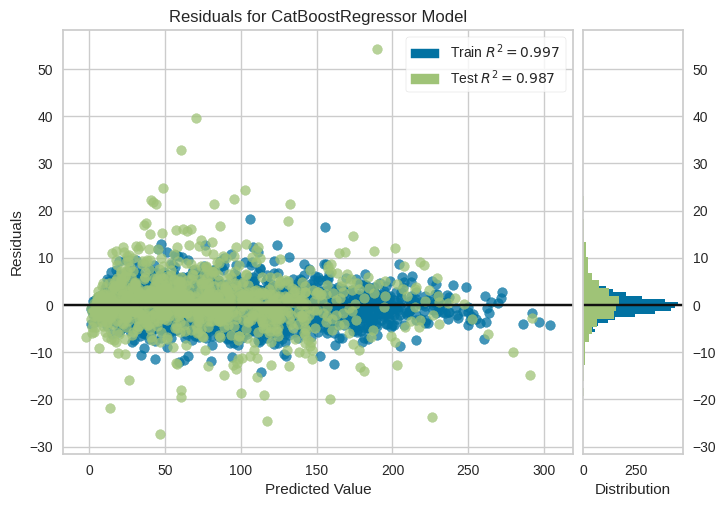

In [ ]:
plot_model(catboost, plot="residuals")

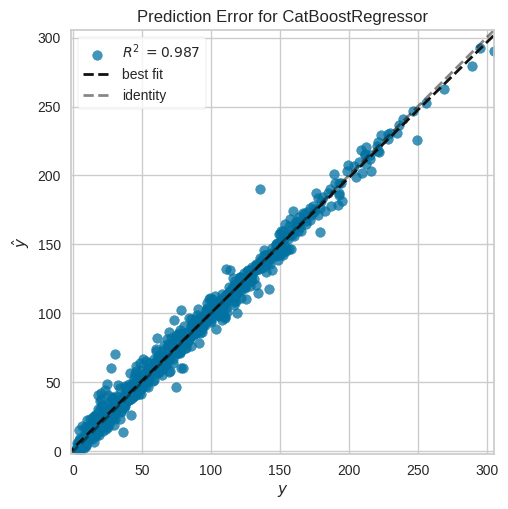

In [ ]:
plot_model(catboost, plot="error")

In [ ]:
tuned_catboost = tune_model(catboost, n_iter=20)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:56:20
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.6875,62.0191,7.8752,0.9808,0.2053,0.1486
1,5.9512,68.4743,8.2749,0.9812,0.2594,0.1642
2,6.1104,72.7107,8.5271,0.9765,0.2520,0.1710
3,5.7718,71.2372,8.4402,0.9760,0.2576,0.1671
4,5.8204,66.0369,8.1263,0.9794,0.2367,0.1677
5,5.3428,57.5593,7.5868,0.9788,0.1855,0.1271
6,5.5349,59.6273,7.7219,0.9822,0.2586,0.1507
7,5.4209,57.8150,7.6036,0.9792,0.2127,0.1412
8,5.6120,60.8034,7.7977,0.9784,0.2387,0.1484


In [ ]:
finalized = finalize_model(tuned_catboost)

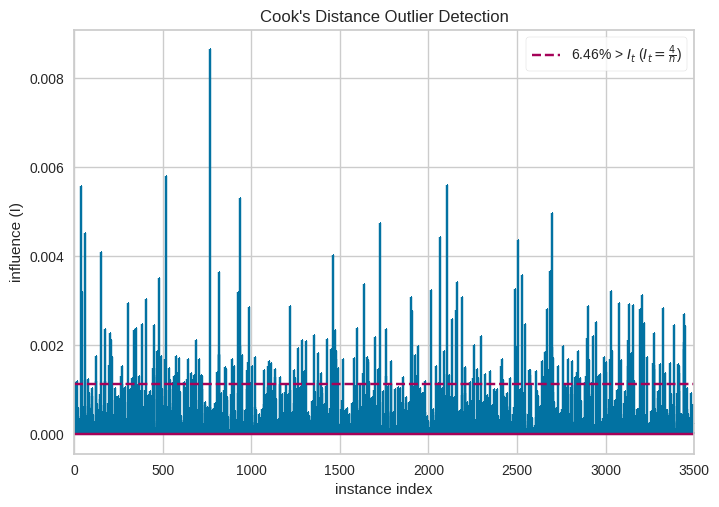

In [ ]:
plot_model(catboost, plot="cooks")

In [ ]:
# plot_model(catboost, plot="rfe") # Recursive feature selection # LONG TIME TO COMPUTE

In [ ]:
# plot_model(catboost, plot="learning") # Learning Curve # LONG TIME TO COMPUTE

In [ ]:
# plot_model(catboost, plot="vc") # Validation Curve # LONG TIME TO COMPUTE

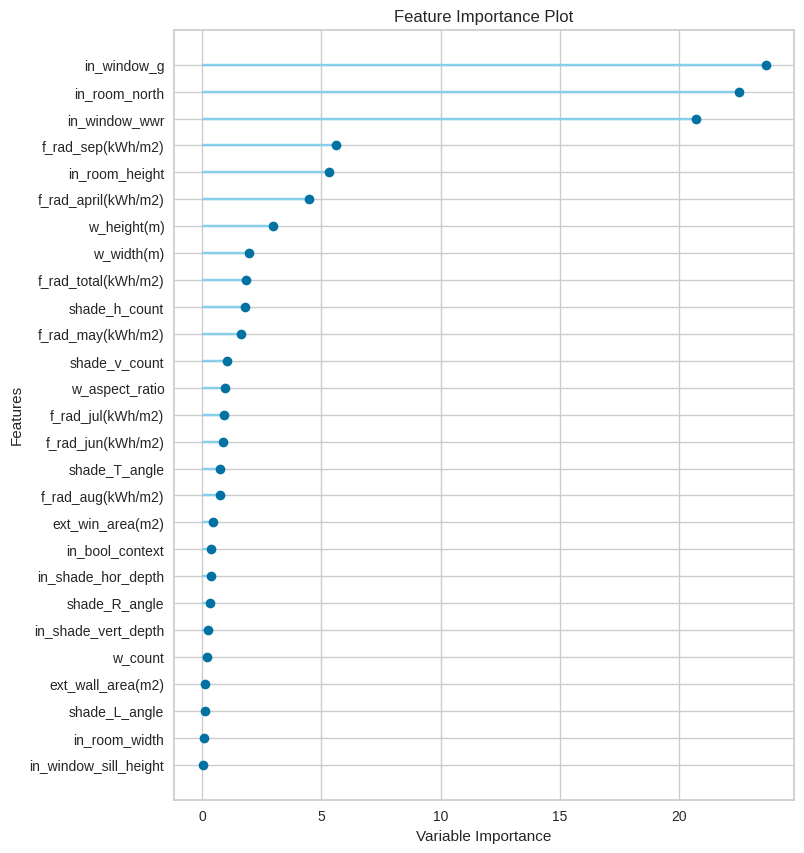

In [ ]:
plot_model(catboost, plot="feature_all") # Feature Importance

In [ ]:
# plot_model(catboost, plot="parameters") # Model Hyperparameters # NOT AVAILABLE FOR CATBOOST

In [ ]:
tuned_catboost = tune_model(catboost, fold=20)

In [ ]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# compare baseline models
best3 = compare_models(n_select=3)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,4.9390,52.6159,7.2456,0.9823,0.2197,0.1373,8.8950
lightgbm,Light Gradient Boosting Machine,6.6955,89.4767,9.4395,0.9702,0.2353,0.1684,3.0550
xgboost,Extreme Gradient Boosting,8.0706,125.2697,11.1754,0.9579,0.2732,0.2011,0.8410
et,Extra Trees Regressor,9.0280,151.7885,12.3076,0.9494,0.2896,0.2499,1.7870
gbr,Gradient Boosting Regressor,9.3043,162.5526,12.7343,0.9455,0.3171,0.2578,2.2460
rf,Random Forest Regressor,9.8697,181.8265,13.4657,0.9395,0.2978,0.2558,4.7030
dt,Decision Tree Regressor,16.0868,499.6320,22.3323,0.8324,0.4075,0.3468,0.0880
ada,AdaBoost Regressor,22.4821,705.0526,26.5369,0.7642,0.6420,0.8482,0.8840
lr,Linear Regression,21.5229,829.6396,28.7907,0.7227,0.6160,0.7700,0.3300
br,Bayesian Ridge,21.5386,830.1266,28.7991,0.7225,0.6122,0.7680,0.0590


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
# tuned_top3 = [tune_model(i) for i in best3]
# blender = blend_models(tuned_top3)
# stacker = stack_models(tuned_top3)
# best_mae_model = automl(optimize = 'MAE')

In [ ]:
# best_mae_model = automl(optimize = 'MAE')

In [ ]:
# evaluate_model(best_mae_model)

In [ ]:
# xgboost = create_model('xgboost')

In [ ]:
# tuned_xgboost = tune_model(xgboost)

In [ ]:
# catboost = create_model("catboost")

In [ ]:
# tuned_catboost = tune_model(catboost)

In [ ]:
# evaluate_model(best)

In [ ]:
# evaluate_model(stacked)

In [ ]:
# # Export stack model to python script
# print(convert_model(best, 'c#'))

In [ ]:
# # Tune the best model
# tuned_best = tune_model(best, optimize='R2', n_iter=50)

In [ ]:
# type(best)

In [ ]:
# finalize_model(best)

In [ ]:
# evaluate_model(best)

In [ ]:
# predict_model(best)

In [ ]:
# # Get test data from pycaret
# test_data = get_config('X_test')
# # Filter values g value above 0.4 and WWR above 70
# test_data = test_data.query('in_window_g > 0.4 and in_window_wwr > 0.7')
# test_data

In [ ]:
# Predict on test data
# predict_model(best, data=test_data)

In [ ]:
# plot residuals
# plot_model(best, plot = 'residuals')

In [ ]:
# plot error
# plot_model(best, plot = 'error')

In [ ]:
# plot feature importance
# plot_model(best, plot = 'feature')

In [ ]:
# predict on test set
# holdout_pred = predict_model(best)

In [ ]:
# show predictions df
# holdout_pred.head()